# Lab 6: Damped and  driven non-linear pendulum

- Most oscillatory motion in nature  gradually decreases until the
  displacement becomes zero; such motion is said to be *damped*. 
- Consider the mass on a spring when a horizontal drag force is
  included.
- For small velocities, assume that the drag force is proportional
  to velocity.  The equation of motion can be written as

\begin{equation*}
\frac{d^2 x}{dt^2} = -\omega_0^2 x - \gamma \frac{dx}{dt}
\end{equation*}

where the *damping coefficient* $\gamma$ is a measure of the
magnitude of the drag term.
- Note that the drag term opposes the motion.

- In the linear case, the response of the damped harmonic
  oscillator to an external driving force is linear.
- If the magnitude of the external force is doubled, then the
  magnitude of the steady state motion is also doubled.
- What happens with a non-linear oscillator?
- Here we consider the non-linear pendulum with an external
  harmonic force and linear drag term.  
- The equation of motion is

\begin{equation*}
mL\frac{d^2 \theta}{dt^2} = -mg \sin \theta - \gamma \frac{d \theta}{dt}
+ F_D \cos(\omega_D t)
\end{equation*}
where $\gamma$ is the friction (damping) parameter, $F_D$ is the strength
of the driving force divided by $mL$, and $\omega_D$ is the driving frequency.

- Convert to dimensionless DEQ.

\begin{equation*}
\tau = t/t_0  \implies dt = t_0 d\tau
\end{equation*}

\begin{equation*}
\frac{mL}{t_0^2}\frac{d^2 \theta}{d\tau^2} = - mg \sin \theta - \frac{\gamma}{t_0} \frac{d \theta}{d\tau}
+ F_D \cos(\omega_D t_0 \tau)
\end{equation*}

\begin{equation*}
\frac{d^2 \theta}{d\tau^2} = - \frac{gt_0^2}{L} \sin \theta -
\frac{\gamma t_0}{mL}  \frac{d \theta}{d\tau}
+ \frac{F_D t_0^2}{mL}  \cos(\omega_D t_0 \tau)
\end{equation*}
- Let $t_0 = \sqrt{L/g} \implies F_D t_0^2/(mL) = F_D L/(mLg) =
  F_D/(mg) = G$. 
- Let $ q = \gamma t_0/mL.$ 
- Let $\Omega_D = \omega_0 t_0$. So

\begin{equation*}
\boxed{\frac{d^2 \theta}{d\tau^2} = - \sin \theta -
q  \frac{d \theta}{d\tau}
+ G \cos(\Omega_D  \tau)}
\end{equation*}

- We want to model this as a set of three coupled ODEs with $\phi = \Omega_d \tau$.

\begin{align}
\frac{d \theta}{d\tau} = \omega \nonumber \\
\frac{d \omega}{d\tau} = -\sin \theta - q \omega + G \cos(\phi) \nonumber \\
\frac{d \phi}{d \tau} = \Omega_D \nonumber
\end{align}

- Chaotic behavior is the interplay between driving forces (i.e., $\Omega_D$) and the
  natural frequency (i.e., $\sqrt{g/L}$).


## Exercise 1: 

Write a python program to simulate a damped, driven pendulum using the 4th-order Runge-Kutta (rk4) method.  The rk4 function should be written as generally as possible to handle the remaining exercises.  You can define multiple functions and pass the name of the function to the rk4 solver.  In this example, the function "F1" is being passed to the "pend_rk4" function.
```python
F = F1
[theta,omega,time] = pend_rk4(F,theta_0,omega_0,taufinal,dtau)
```
The (inadequately-commented) code included below will get you started. 

Be prepared to plot the periodic angle $\theta$ on the interval $-\pi < \theta \le \pi$.  A driven pendulum can make circular motions with $|\theta|$ increasing to large values.  It might be useful to consider the "mod" operator (%) and the ``` np.where ``` function.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import resample

#---------------------------------------------------------------------------------
def F1(theta,omega,tau):
    return np.array([omega, -np.sin(theta) - gamma*omega + G*np.cos(Omega_d*tau)])   #Returns omega (theta-dot) & omega-dot
#---------------------------------------------------------------------------------   #"gamma" is actually supposed to be q

#---------------------------------------------------------------------------------
def pend_rk4(F,theta1,omega1,taufinal,dtau):  #dimensionless solve
    theta = []
    omega = []
    time = []
    tau = 0.0
    while tau < taufinal:
        time.append(tau)
        theta.append(theta1)
        omega.append(omega1)
        k1 = dtau*F(theta1,omega1,tau)
        k2 = dtau*F(theta1 + 0.5*k1[0], omega1 + 0.5*k1[1], tau+dtau/2.)
        k3 = dtau*F(theta1 + 0.5*k2[0], omega1 + 0.5*k2[1], tau+dtau/2.)
        k4 = dtau*F(theta1 + k3[0], omega1 + k3[1], tau+dtau)
        theta1 = theta1 + (k1[0] + 2*k2[0] + 2*k3[0] + k4[0])/6.                     #theta^(n+1) 
        omega1 = omega1 + (k1[1] + 2*k2[1] + 2*k3[1] + k4[1])/6.                     #omega^(n+1)
        tau = tau+dtau
    return np.asarray(theta),np.asarray(omega),np.asarray(time)                      #[0] = theta, [1] = omega, [2] = time
#---------------------------------------------------------------------------------


## Exercise 2:

Examine the case of zero damping, zero driving, and small angle.  Here, $q \rightarrow 0$, $G \rightarrow 0$, $\Omega_D \rightarrow 0$, and $\sin \theta \rightarrow \theta$ such that
\begin{eqnarray*}
\frac{d \theta}{d \tau} &=& \omega\\
\frac{d \omega}{d \tau} & = & - \theta
\end{eqnarray*}
with analytical solutions $\theta(\tau) = A \cos \tau$ and $\omega(\tau) = - A \sin \tau$ where A is determined from initial conditions [$\theta(\tau = 0)$]. Plot the phase space trajectory ($\omega$ vs. $\theta$) for several cycles.  Is the area preserved properly?  If not, experiment with the time step. We expect the area to be preserved for conservative systems. 


Text(0, 0.5, 'Omega ($\\omega$)')

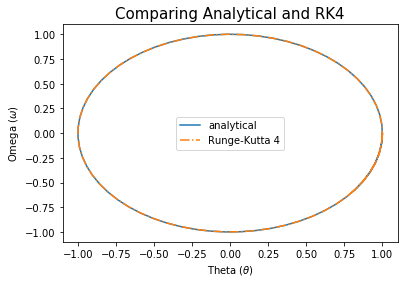

In [2]:
# q_2 = 0
# G_2 = 0 
# Omega_d = 0
dtau = 0.1
taufinal = 7
tau = np.arange(0,taufinal,dtau)
theta1 = 1.0                         #initial theta
omega1 = 0.0                         #initial omega
#---------------------------------------------------------------------------------------------------------------------------

def F2(theta,omega,tau):                                 #Function "F" for Exercise 2
    return np.array([omega,-theta])                      #theta-dot = omega; omega-dot = -theta

def analytical(tau):
    return np.array([np.cos(tau),-np.sin(tau)])          #analytical returns: [cos(tau),-sin(tau)] = [theta, omega]
#---------------------------------------------------------------------------------------------------------------------------
ana = analytical(tau)
prk4_2 = pend_rk4(F2,theta1,omega1,taufinal,dtau)        #prk4_2 = pendulum RK4 for Exercise 2

#Graphing
plt.plot(ana[0],ana[1],label= "analytical")
plt.plot(prk4_2[0],prk4_2[1],"-.",label = "Runge-Kutta 4")
plt.legend()
plt.title("Comparing Analytical and RK4",Fontsize = 15)
plt.xlabel("Theta ($\\theta$)")
plt.ylabel("Omega ($\omega$)")
#plt.axes().set_aspect('equal')

## Exercise 3: 

Now consider nonzero damping (e.g., $q = 0.5$), zero driving, and small angle.  Here, $G \rightarrow 0$ and $\sin \theta \rightarrow \theta$.  The solutions are 
\begin{eqnarray*}
\frac{d \theta}{d \tau } &=& \omega \\
\frac{d \omega}{d \tau} & = & -q \omega - \theta.
\end{eqnarray*}
Plot the phase space trajectory.  Is the phase space area preserved?  This is a dispersive system now.


Text(0, 0.5, 'Omega ($\\omega$)')

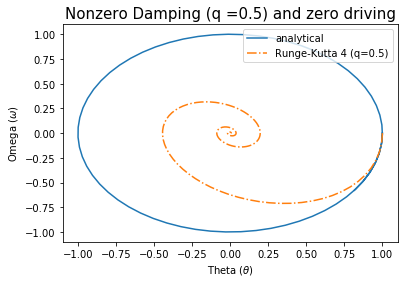

In [3]:
# G_3 = 0
# sin(theta) = theta
dtau = 0.1
taufinal = 20
tau = np.arange(0,taufinal,dtau)
theta1 = 1.0             #initial theta
omega1 = 0.0             #initial omega
q_3 = 0.5                #q value for exercise 3
#---------------------------------------------------------------------------------------------------------------------------
def F3(theta,omega,tau):                               #Function "F" for Exercise 3
    return np.array([omega, -q_3*omega - theta])       #theta-dot = omega; omega-dot = -q*omega - theta

prk4_3 = pend_rk4(F3,theta1,omega1,taufinal,dtau)      #prk4_3 = pendulum rk4 for Exercise 3

#Graphing
plt.plot(ana[0],ana[1],label= "analytical")            #"analytical" is comparing to when theta= cos(tau), omega = -sin(tau), A = 1
plt.plot(prk4_3[0],prk4_3[1],"-.",label = "Runge-Kutta 4 (q="+str(q_3)+")")
plt.legend()
plt.title("Nonzero Damping (q ="+str(q_3)+") and zero driving",Fontsize = 15)
plt.xlabel("Theta ($\\theta$)")
plt.ylabel("Omega ($\omega$)")

## Exercise 4

Now consider the non-linear term for zero damping and zero driving, i.e., $q \rightarrow 0$, $G \rightarrow 0$, with equations
\begin{eqnarray*}
\frac{d \theta}{d \tau} &=& \omega \\
\frac{d \omega}{d \tau} &=& - \sin \theta.
\end{eqnarray*}
The phase space trajectories are $\frac{1}{2} \omega^2 - \cos \theta = const$.  Proof:
\begin{eqnarray*}
\frac{d \omega}{d \tau} &=& \frac{d \omega}{d \theta}\frac{d \theta}{d \tau} = - \sin \theta\\
& = & \omega \frac{d \omega}{d \theta} = - \sin \theta \\
& = & \frac{d}{d \theta} \left[ \frac{1}{2} \omega^2 \right]  =  \frac{d}{d\theta} [\cos \theta]
\end{eqnarray*}
Plot several phase space trajectories for different initial conditions.

C:\Users\Jasmine K\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


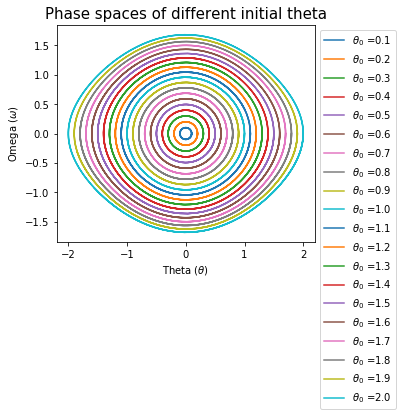

In [4]:
# q_4 = 0
# G_4 = 0
dtau = 0.1
taufinal = 20
tau = np.arange(0,taufinal,dtau)
theta_i = np.arange(0.1,2.1,0.1)                    #array of different initial thetas
omega1 = 0.0
#---------------------------------------------------------------------------------------------------------------------------
def F4(theta,omega,tau):                            #Function "F" for Exercise 4
    return np.array([omega,-np.sin(theta)])         #theta-dot = omega; omega-dot = -sin(theta)

prk4_th = []                                        #array of 'pend_rk4' function for differnt initial thetas
for i in range(len(theta_i)):
    rk4_4 = pend_rk4(F4,theta_i[i],omega1,taufinal,dtau)
    prk4_th.append(rk4_4)
    p4 = prk4_th[i]
#Graphing
    plt.plot(p4[0],p4[1],label = "$\\theta_0$ ="+ str(round(theta_i[i],1)))   #graphing phase space for each initial condition

plt.legend(loc='upper left',bbox_to_anchor=(1.0,1.0))
plt.title("Phase spaces of different initial theta",Fontsize = 15)
plt.xlabel("Theta ($\\theta$)")
plt.ylabel("Omega ($\omega$)")
plt.axes().set_aspect('equal')

## Exercise 5

Repeat exercise 4 with nonzero damping (e.g., $q = 0.5$).  Here the equations are 
\begin{eqnarray*}
\frac{d \theta}{d \tau} &=& \omega \\
\frac{d \omega}{ d \tau} & = & - q \omega - \sin \theta
\end{eqnarray*}

Experiment with different values of $q$.

Text(0, 0.5, 'Omega ($\\omega$)')

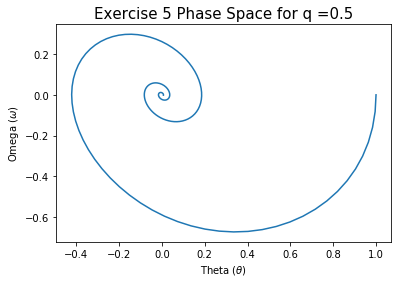

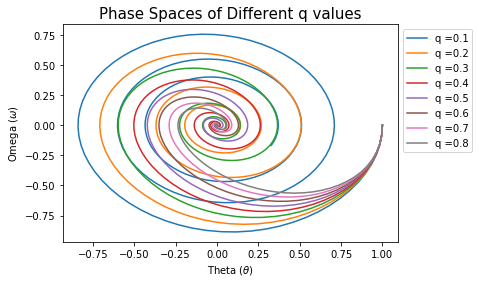

In [5]:
q_5 = 0.5                              #single q value to test
theta1 = 1.0
omega1 = 0.0
q_diff5 = np.arange(0.1,0.9,0.1)        #array of different q values
#---------------------------------------------------------------------------------------------------------------------------
def F5(theta,omega,tau):                                           #Function "F" for single q value (for Exercise 5)
    return np.array([omega, -q_5*omega - np.sin(theta)])           #theta-dot = omega; omega-dot = -q*omega - sin(theta)

prk4_5 = pend_rk4(F5,theta1,omega1,taufinal,dtau)

#Phase space graph for single specific q value defined by q_5   
plt.figure(1)
plt.plot(prk4_5[0],prk4_5[1])
plt.title("Exercise 5 Phase Space for q ="+str(q_5),Fontsize = 15)
plt.xlabel("Theta ($\\theta$)")
plt.ylabel("Omega ($\omega$)")


#varying q values
plt.figure(2)
prk4_q = []                                                         #array of pend_rk4 function for each q value
for j in range(len(q_diff5)):
    def F5_変(theta,omega,tau):                                     #Function "F" for different q values   #変 = change(changing)
        return np.array([omega, -q_diff5[j]*omega - np.sin(theta)])
    rk4_5 = pend_rk4(F5_変,theta1,omega1,taufinal,dtau)             #pend_rk4 function at [j] (at specific q value)
    prk4_q.append(rk4_5)
    p4_5 = prk4_q[j]
    plt.plot(p4_5[0],p4_5[1],label = "q ="+str(round(q_diff5[j],1)))

plt.legend(loc='upper left',bbox_to_anchor=(1.0,1.0))
plt.title("Phase Spaces of Different q values",Fontsize = 15)
plt.xlabel("Theta ($\\theta$)")
plt.ylabel("Omega ($\omega$)")

## Exercise 6

Repeat exercise 4 with nonzero damping (e.g., $q = 0.5$), nonzero driving (e.g., $G = 0.5$), and small angle (mass on a spring).  The equations are
\begin{eqnarray*}
\frac{d \theta}{d \tau} &=& \omega \\
\frac{d \omega}{d \tau} & = & -q \omega - \theta + G \sin \theta \\
\frac{ d \phi}{d \tau} & = & \Omega_D
\end{eqnarray*}

Experiment with different values of $q$ and $G$.

Text(0, 0.5, 'Omega ($\\omega$)')

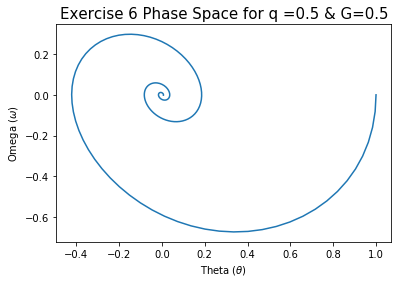

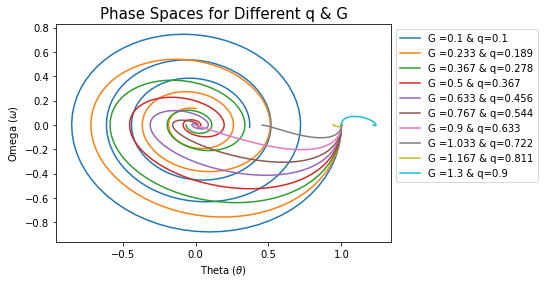

In [6]:
q_6 = 0.5                                            #Single q value to test w/ G
G_6 = 0.5                                            #Single G value to test w/ q
taufinal = 20
q_diff6 = np.linspace(0.1,0.9,10)                    #array of different q values
G_diff6 = np.linspace(0.1,1.3,10)                    #array of different G values
theta1 = 1.0
omega1 = 0.0
#---------------------------------------------------------------------------------------------------------------------------
def F6(theta,omega,tau):                                              #Function "F" for single q & G value (for Exercise 6)
    return np.array([omega,-q_6*omega - theta + G_6*np.sin(theta)])   #theta-dot = omega; omega-dot = -q*omega - theta + G*sin(theta)

prk4_6 = pend_rk4(F6,theta1,omega1,taufinal,dtau)                     #prk4_6 = pendulum rk4 for Exercise 6

#Graph for single q & G values, as defined by q_6 & G_6
plt.figure(1) 
plt.plot(prk4_5[0],prk4_5[1])
plt.title("Exercise 6 Phase Space for q ="+str(q_6)+" & G="+str(G_6),Fontsize = 15)
plt.xlabel("Theta ($\\theta$)")
plt.ylabel("Omega ($\omega$)")

#Varying q & G values
plt.figure(2)
prk4_qG = []                                                         #array of pend_rk4 function for each q & G 
for k in range(len(G_diff6)):
    def F6_変qG(theta,omega,tau):                                    #Function "F"(ex.6) for different q & G values
        return np.array([omega, -q_diff6[k]*omega - theta + G_diff6[k]*np.sin(theta)])
    rk4_6qG = pend_rk4(F6_変qG,theta1,omega1,taufinal,dtau)
    prk4_qG.append(rk4_6qG)
    p4_6qG = prk4_qG[k]
    plt.plot(p4_6qG[0],p4_6qG[1],label = "G ="+str(round(G_diff6[k],3))+" & q="+str(round(q_diff6[k],3)))

plt.legend(loc='upper left',bbox_to_anchor=(1.0,1.0))
plt.title("Phase Spaces for Different q & G",Fontsize = 15)
plt.xlabel("Theta ($\\theta$)")
plt.ylabel("Omega ($\omega$)")

## Exercise 7

Finally, investigate the damped, sinusoidally-driven pendulum.  Make two plots for each case: 1) phase space and 2) a stroboscopic phase space.  Generally, the steady solution settles with a period equal to $\Omega_D$.  You will want to sample the results with the $\Omega_D$ frequency. This corresponds to times
\begin{equation*}
 t = \frac{2 \pi}{\Omega_D} n 
\end{equation*}
where $n$ is the number of completed cycles.  For well-behaved systems, this reduces the phase space plot to a single point: the value of ($\theta, \omega$) that is repeated at each cycle.  Chaotic system behave differently, but surprisingly the points gather on preferred points, or *strange attractors*.

Run the program for the following parameters ($q = 0.5$): $G = [0.5, 0.9, 1.07, 1.15, 1.35, 1.47, 1.5]$.
Finally, try G = 1.5 for different values of $q$.

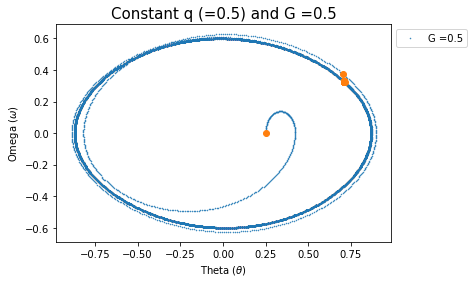

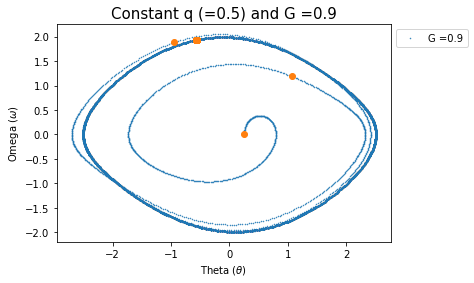

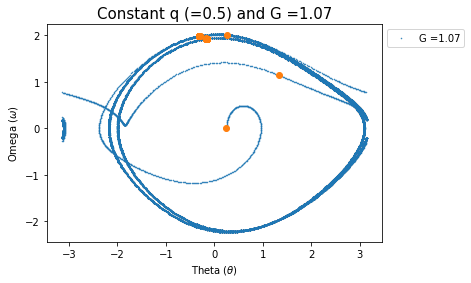

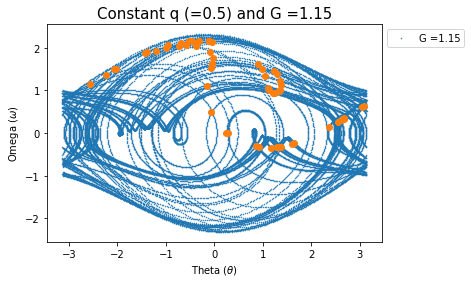

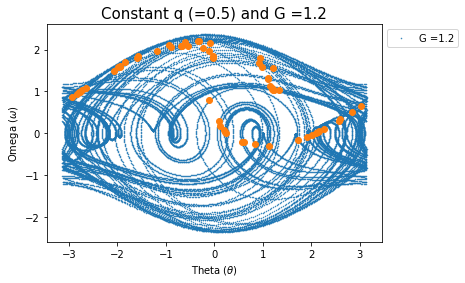

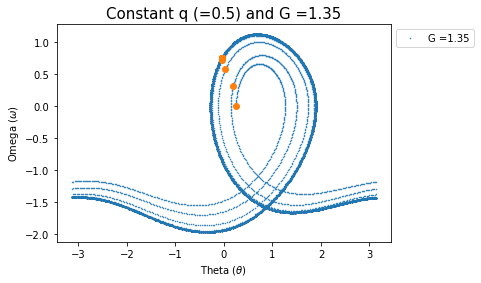

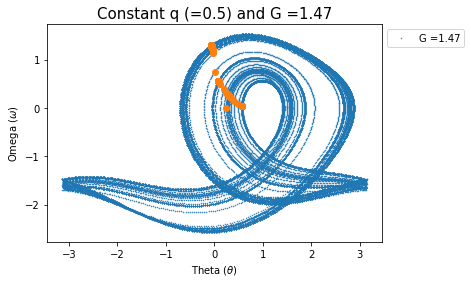

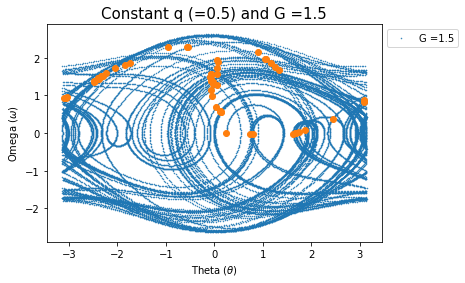

In [7]:
# Different G for q = 0.5
theta1 = 0.25
omega1 = 0.0
q7_c = 0.5                                     #Constant q value
G7_変 = [0.5,0.9,1.07,1.15,1.2,1.35,1.47,1.5]  #Different G values
dtau = 0.02
tau = np.arange(0,taufinal,dtau)
Omega_d = 0.667        
taufinal = 60*(2*np.pi/Omega_d)                #tau-final in respect to period
#---------------------------------------------------------------------------------------------------------------------------

prk4_7 = []                                                             #array of pend_rk4 function for each G (using F7_変G)
for l in range(len(G7_変)):
    def F7_変G(theta,omega,tau):                                        #Function "F" (ex.7) for different G 
        return np.array([omega, -np.sin(theta) - (q7_c*omega) + (G7_変[l]*np.cos(Omega_d*tau))])
    rk4_7G = pend_rk4(F7_変G,theta1,omega1,taufinal,dtau)
    prk4_7.append(rk4_7G)
    p4_7G = prk4_7[l]
    theta = (p4_7G[0]+ np.pi)%(2*np.pi)-np.pi                           #keeping theta between -pi and pi
    
    #Graphing phase space for each G value
    plt.figure(l)
    plt.plot(theta, p4_7G[1],".",markersize = 1,label = "G ="+str(G7_変[l]))
    plt.legend(loc='upper left',bbox_to_anchor=(1.0,1.0))
    plt.title("Constant q (="+str(q7_c)+") and G ="+str(G7_変[l]),Fontsize = 15)
    plt.xlabel("Theta ($\\theta$)")
    plt.ylabel("Omega ($\omega$)")
    
    #stuff for strobes
    ncycles = round((taufinal)*(Omega_d/(2*np.pi)))
    nstep = int(len(theta)/ncycles)
    plt.plot(theta[::nstep], p4_7G[1][::nstep],"o")


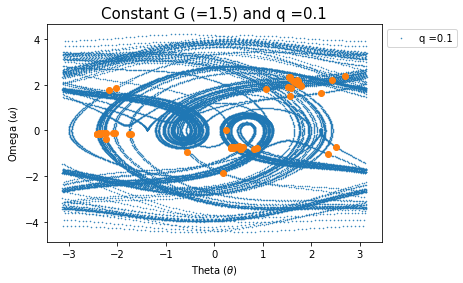

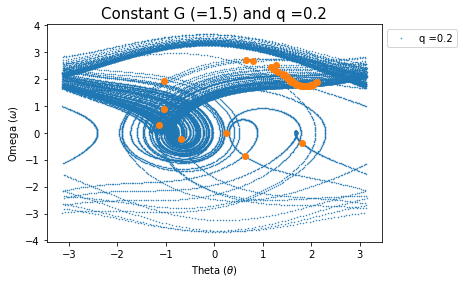

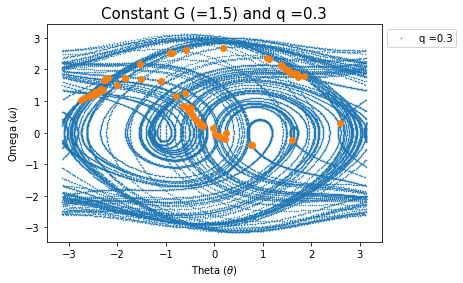

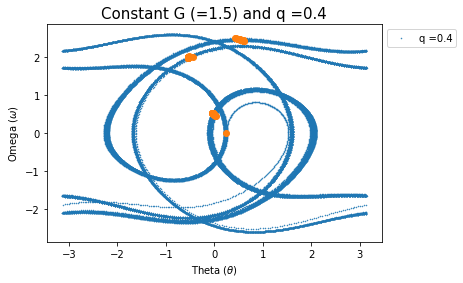

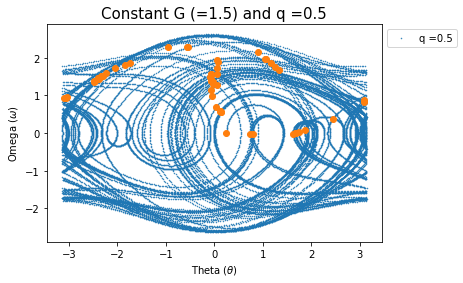

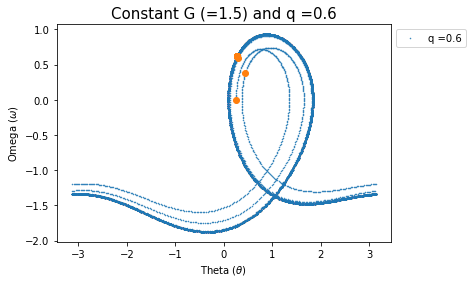

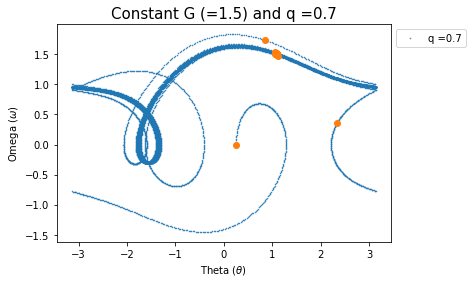

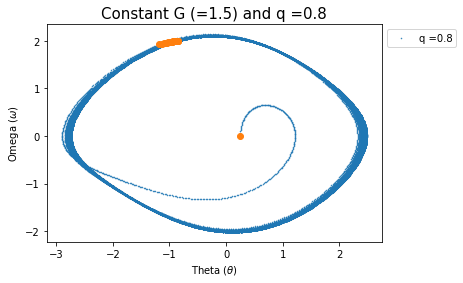

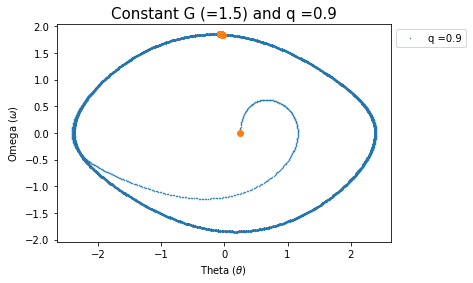

In [8]:
#Different q for G = 1.5
theta1 = 0.25
omega1 = 0.0
dtau = 0.02
tau = np.arange(0,taufinal,dtau)
Omega_d = 0.667        
taufinal = 60*(2*np.pi/Omega_d)                #tau-final in respect to period
G7_c = 1.5                                     #Constant G value                           
q7_変 = np.arange(0.1,1.0,0.1)                 #Different q values
#---------------------------------------------------------------------------------------------------------------------------
prk4_7q = []
for m in range(len(q7_変)):
    def F7_変q(theta,omega,tau):                                       #Function "F" (ex.7) for different q
        return np.array([omega, -np.sin(theta) - q7_変[m]*omega + G7_c*np.cos(Omega_d*tau)])
    rk4_7q = pend_rk4(F7_変q,theta1,omega1,taufinal,dtau)
    prk4_7q.append(rk4_7q)
    p4_7q = prk4_7q[m]
    theta_q = (p4_7q[0]+ np.pi)%(2*np.pi)-np.pi                        #keeping theta between -pi and pi
    
    #Graphing phase space for each q value
    plt.figure(m)
    plt.plot(theta_q, p4_7q[1],".",markersize = 1,label = "q ="+str(round(q7_変[m],1)))
    plt.legend(loc='upper left',bbox_to_anchor=(1.0,1.0))
    plt.title( "Constant G (="+str(G7_c)+") and q ="+str(round(q7_変[m],1)),Fontsize = 15)
    plt.xlabel("Theta ($\\theta$)")
    plt.ylabel("Omega ($\omega$)")

    #Stuff for strobes
    ncycles = round((taufinal)*(Omega_d/(2*np.pi)))
    nstep = int(len(theta_q)/ncycles)
    plt.plot(theta_q[::nstep],p4_7q[1][::nstep],"o")

## Exercise 8 (optional)

Time permitting, attempt to make a *bifurcation diagram*.  Determine the steady state periods (can be multiple periods) vs. G.  Try running for $0.9 < G < 1.2$.